In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [7]:
cwd = os.getcwd()
pokemon_path = os.path.join(os.path.dirname(cwd),'Data','pokemon.csv')

# Reading Data for Pokemon Dataset

In [5]:
pokemon_data = pd.read_csv(pokemon_path)

In [6]:
pokemon_data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


# Basic Analysis for Structure of Data

In [8]:
# info of data telling column how many values present in a columna and datatype
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [9]:
# datatypes for all columns
pokemon_data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [10]:
# unique values in columns
pokemon_data.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [42]:
# get basic overview of all stats
pokemon_data.iloc[:,list(range(4,10))].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [46]:
pokemon_data['Generation'].nunique()
pokemon_data['Generation'].unique().tolist()

6

[1, 2, 3, 4, 5, 6]

In [47]:
pokemon_data['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

# Checking for Values after Analysing Structure

### checking for name not present

In [17]:
pokemon_data[pokemon_data['Name'].isna()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [18]:
# checking which is previous to the missing one
pokemon_data.loc[61]

#                   62
Name            Mankey
Type 1        Fighting
Type 2             NaN
HP                  40
Attack              80
Defense             35
Sp. Atk             35
Sp. Def             45
Speed               70
Generation           1
Legendary        False
Name: 61, dtype: object

In [20]:
# assigning value to primeape as it is evolution of previous one
pokemon_data.loc[62,'Name'] = 'Primeape'

In [25]:
# checking if value assigned properly
pokemon_data.loc[62]

#                   63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

In [26]:
# checking how many unique names are there in dataset
pokemon_data['Name'].nunique()

800

### checking value_counts for type1 and type2

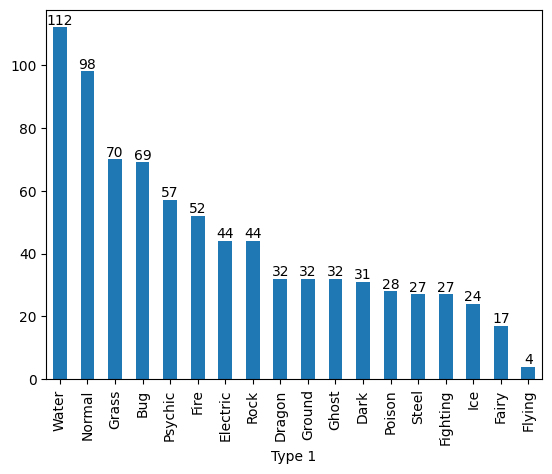

In [37]:
pokemon_data['Type 1'].value_counts().plot(kind='bar')
for bar, value in enumerate(pokemon_data['Type 1'].value_counts()):
    plt.text(bar, value, str(value), ha='center', va='bottom')
plt.show();

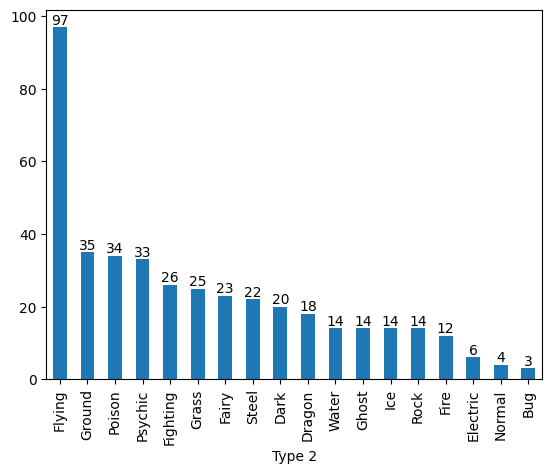

In [38]:
pokemon_data['Type 2'].value_counts().plot(kind='bar')
for bar, value in enumerate(pokemon_data['Type 2'].value_counts()):
    plt.text(bar, value, str(value), ha='center', va='bottom')
plt.show();

### value_counts for type 1 and type 2

In [39]:
pokemon_data[['Type 1','Type 2']].value_counts()

Type 1    Type 2
Normal    Flying    24
Grass     Poison    15
Bug       Flying    14
          Poison    12
Ghost     Grass     10
                    ..
Fire      Rock       1
Ice       Ghost      1
Fire      Dragon     1
Fighting  Flying     1
Water     Steel      1
Name: count, Length: 136, dtype: int64

### plot for value_counts for generations

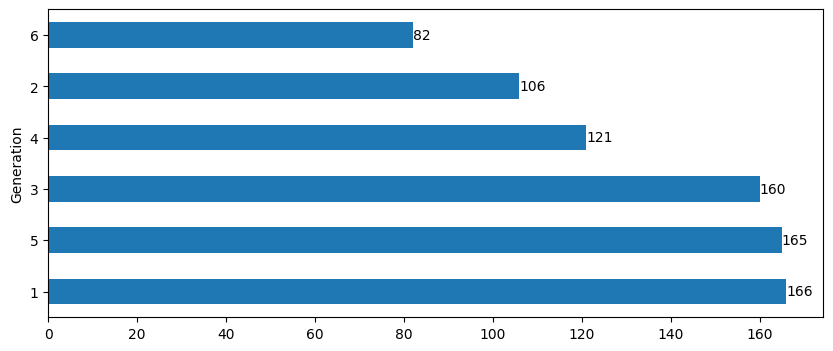

In [92]:
plt.figure(figsize=(10, 4))
pokemon_data['Generation'].value_counts().plot(kind='barh')
for bar, value in enumerate(pokemon_data['Generation'].value_counts()):
    plt.text(value, bar, str(value), ha='left', va='center')
plt.show();

### plot for legendaries

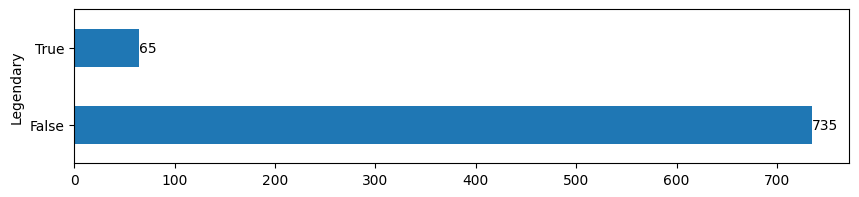

In [85]:
plt.figure(figsize=(10, 2))
pokemon_data['Legendary'].value_counts().plot(kind='barh')
for bar, value in enumerate(pokemon_data['Legendary'].value_counts()):
    plt.text(value, bar, str(value), ha='left', va='center')
plt.show();

# Feature Engineering

> total --> sum of all parameters<br>
> physical total --> sum of physical parameters<br>
> special total --> sum of special parameters<br>
> attack total --> sum of attacks<br>
> defense total --> sum of defense<br>

In [97]:
pokemon_data.columns = pokemon_data.columns.str.lower()
pokemon_data.columns

Index(['#', 'name', 'type 1', 'type 2', 'hp', 'attack', 'defense', 'sp. atk',
       'sp. def', 'speed', 'generation', 'legendary'],
      dtype='object')

In [107]:
# total
pokemon_data['total'] = pokemon_data['hp'] + pokemon_data['attack'] + pokemon_data['defense'] + \
    pokemon_data['sp. atk'] + pokemon_data['sp. def'] + pokemon_data['speed']

# physical total
pokemon_data['physical total'] = pokemon_data['attack'] + pokemon_data['defense']

# special total
pokemon_data['special total'] = pokemon_data['sp. atk'] + pokemon_data['sp. def']

# attack total
pokemon_data['attack total'] = pokemon_data['attack'] + pokemon_data['sp. atk']

# defense total
pokemon_data['defense total'] = pokemon_data['defense'] + pokemon_data['sp. def']

In [110]:
pokemon_data.iloc[:,list(range(4,10)) + list(range(12,pokemon_data.shape[1]))].describe()

,hp,attack,defense,sp. atk,sp. def,speed,total,physical total,special total,attack total,defense total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,435.10250,152.843750,144.722500,151.821250,145.745000
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,119.96304,53.980661,52.602012,54.462505,51.315827
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.00000,10.000000,35.000000,20.000000,35.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,330.00000,112.000000,105.000000,111.750000,109.750000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,450.00000,150.000000,140.000000,146.500000,140.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.00000,188.250000,180.000000,182.000000,180.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.00000,370.000000,340.000000,360.000000,460.000000


# Analysing Pokemon with different stats